# **DATA INSPECTION**

## Objectives

- To examine the structure and quality of the input dataset
- To identify missing values, outliers, and anomalies
- To understand data distributions and relationships

## Inputs

- Raw dataset(s)
- house_prices_records.csv
- inherited_houses.csv

## Outputs

* Data quality report including:
- 
- 
- 

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/P5-Heritage-Housing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/P5-Heritage-Housing'

# HOUSE PRICES

## 1. Dataset Information Analysis

In [2]:
import numpy as np
import pandas as pd

house_prices_df = pd.read_csv(f"/workspace/P5-Heritage-Housing/outputs/datasets/collection/house_prices.csv")
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1422 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1315 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1225 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

- This explanation provides a comprehensive overview of the dataset's structure, missing values, and potential next steps for data preprocessing.

---

## 2. Data Description Summary

In [3]:
house_prices_df.describe()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
count,1460.000000,1374.000000,1361.000000,1460.000000,1460.000000,136.000000,1460.000000,1379.000000,1460.000000,1460.000000,1201.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,155.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,348.524017,2.869214,443.639726,567.240411,25.330882,472.980137,1978.506164,1515.463699,10516.828082,70.049958,103.685262,46.660274,5.575342,6.099315,1057.429452,103.741935,1971.267808,1984.865753,180921.195890
std,386.587738,438.865586,0.820115,456.098091,441.866955,66.684115,213.804841,24.689725,525.480383,9981.264932,24.284752,181.066207,66.256028,1.112799,1.382997,438.705324,135.543152,30.202904,20.645407,79442.502883
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,334.000000,1300.000000,21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1872.000000,1950.000000,34900.000000
25%,882.000000,0.000000,2.000000,0.000000,223.000000,0.000000,334.500000,1961.000000,1129.500000,7553.500000,59.000000,0.000000,0.000000,5.000000,5.000000,795.750000,0.000000,1954.000000,1967.000000,129975.000000
50%,1087.000000,0.000000,3.000000,383.500000,477.500000,0.000000,480.000000,1980.000000,1464.000000,9478.500000,69.000000,0.000000,25.000000,5.000000,6.000000,991.500000,0.000000,1973.000000,1994.000000,163000.000000
75%,1391.250000,728.000000,3.000000,712.250000,808.000000,0.000000,576.000000,2002.000000,1776.750000,11601.500000,80.000000,166.000000,68.000000,6.000000,7.000000,1298.250000,182.500000,2000.000000,2004.000000,214000.000000
max,4692.000000,2065.000000,8.000000,5644.000000,2336.000000,286.000000,1418.000000,2010.000000,5642.000000,215245.000000,313.000000,1600.000000,547.000000,9.000000,10.000000,6110.000000,736.000000,2010.000000,2010.000000,755000.000000


- The "describe()" function provides a statistical summary of the numerical columns in the dataset.

In [4]:
house_prices_df.isnull().sum()

1stFlrSF            0
2ndFlrSF           86
BedroomAbvGr       99
BsmtExposure       38
BsmtFinSF1          0
BsmtFinType1      145
BsmtUnfSF           0
EnclosedPorch    1324
GarageArea          0
GarageFinish      235
GarageYrBlt        81
GrLivArea           0
KitchenQual         0
LotArea             0
LotFrontage       259
MasVnrArea          8
OpenPorchSF         0
OverallCond         0
OverallQual         0
TotalBsmtSF         0
WoodDeckSF       1305
YearBuilt           0
YearRemodAdd        0
SalePrice           0
dtype: int64

- Identifying columns that have values in the dataset

In [5]:
house_prices_df[house_prices_df.duplicated(subset=None)]

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice


- Checking if there are any repeating or duplicated rows.

## 3. Distribution

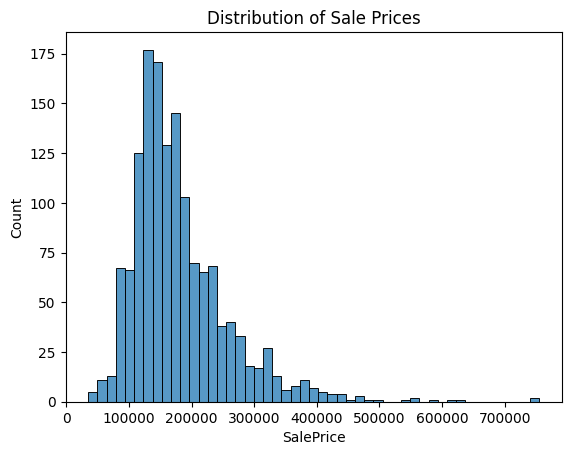

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=house_prices_df['SalePrice'])
plt.title('Distribution of Sale Prices')
plt.show()

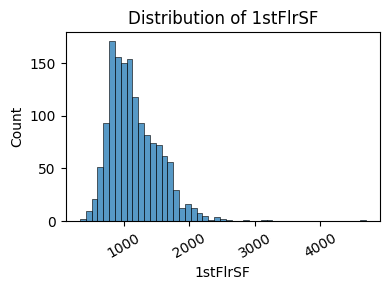

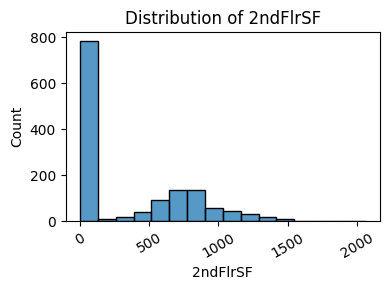

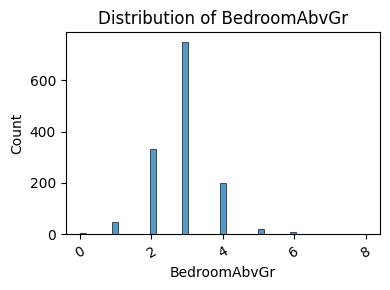

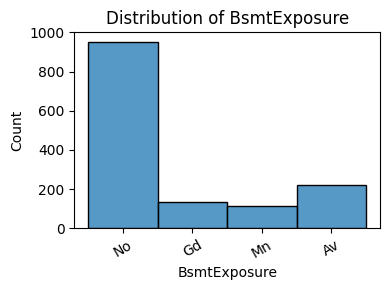

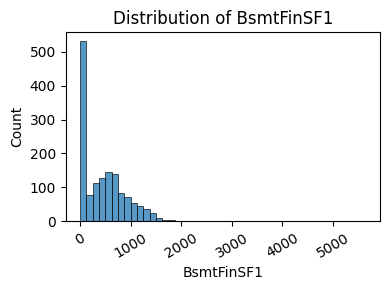

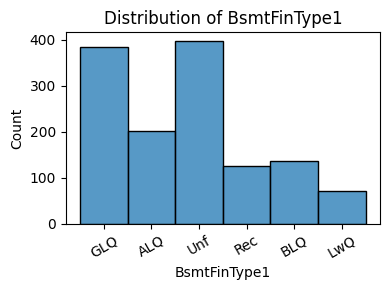

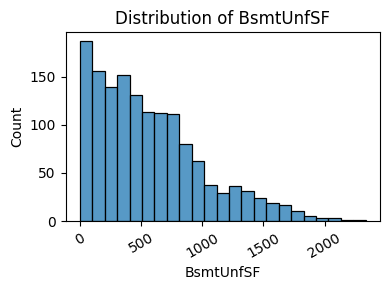

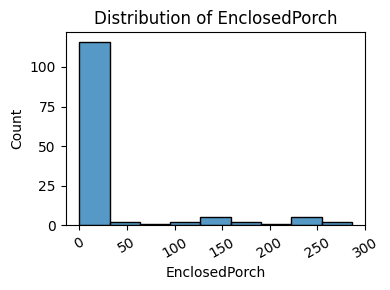

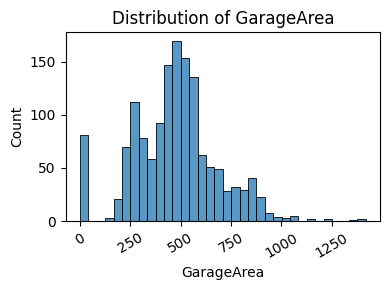

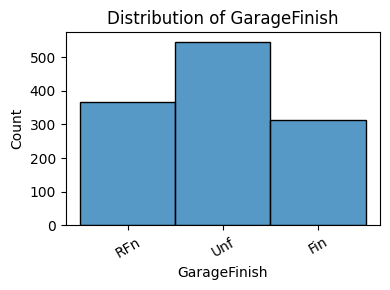

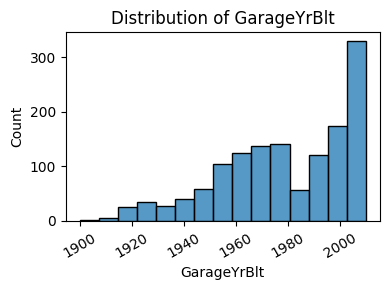

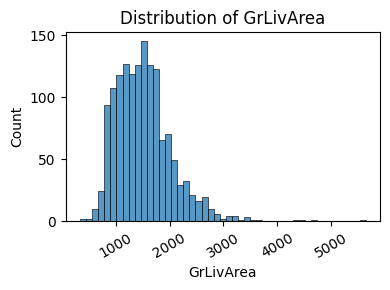

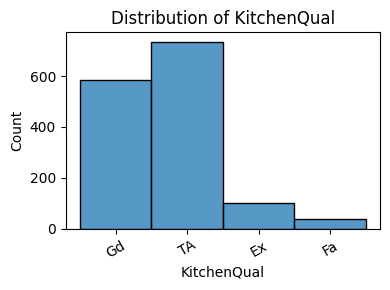

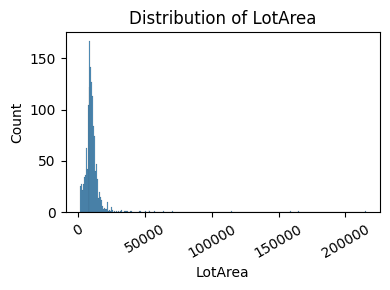

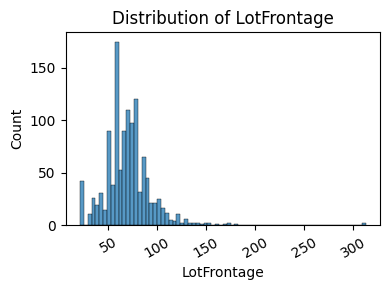

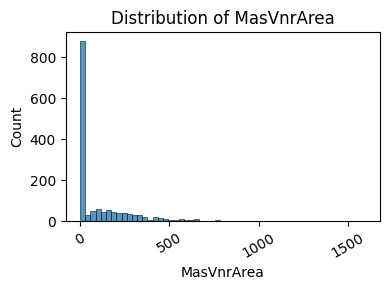

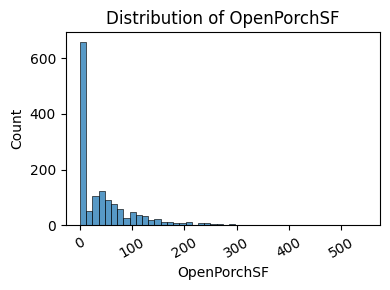

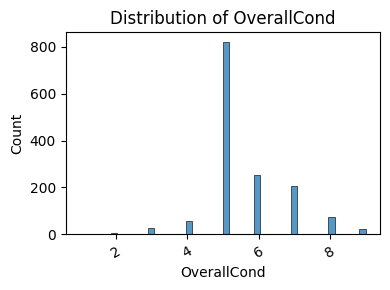

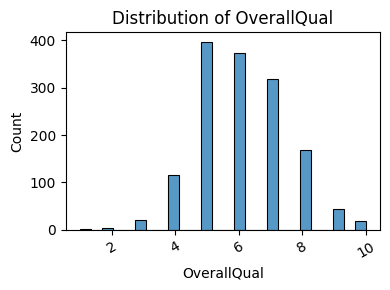

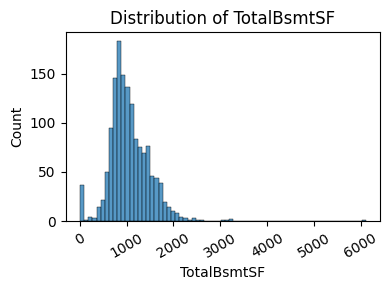

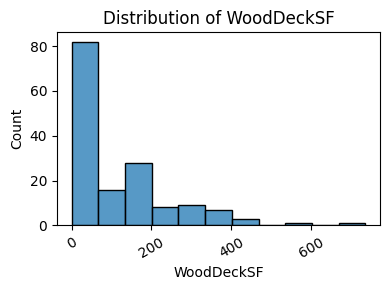

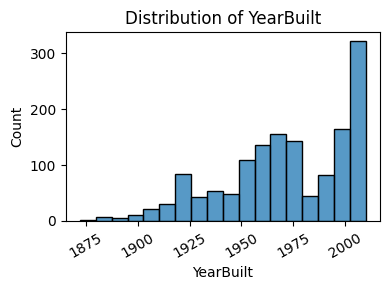

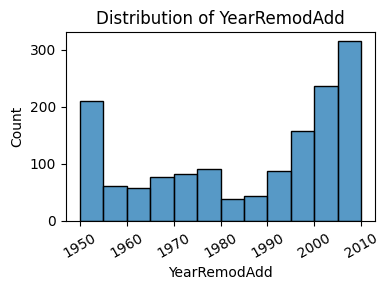

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_examine = house_prices_df
features_to_examine = features_to_examine.drop('SalePrice', axis=1)
for column in features_to_examine.columns:
    plt.figure(figsize=(4,3))
    sns.histplot(data=house_prices_df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
    

1stFlrSF            0
2ndFlrSF           86
BedroomAbvGr       99
BsmtExposure       38
BsmtFinSF1          0
BsmtFinType1      145
BsmtUnfSF           0
EnclosedPorch    1324
GarageArea          0
GarageFinish      235
GarageYrBlt        81
GrLivArea           0
KitchenQual         0
LotArea             0
LotFrontage       259
MasVnrArea          8
OpenPorchSF         0
OverallCond         0
OverallQual         0
TotalBsmtSF         0
WoodDeckSF       1305
YearBuilt           0
YearRemodAdd        0
SalePrice           0
dtype: int64


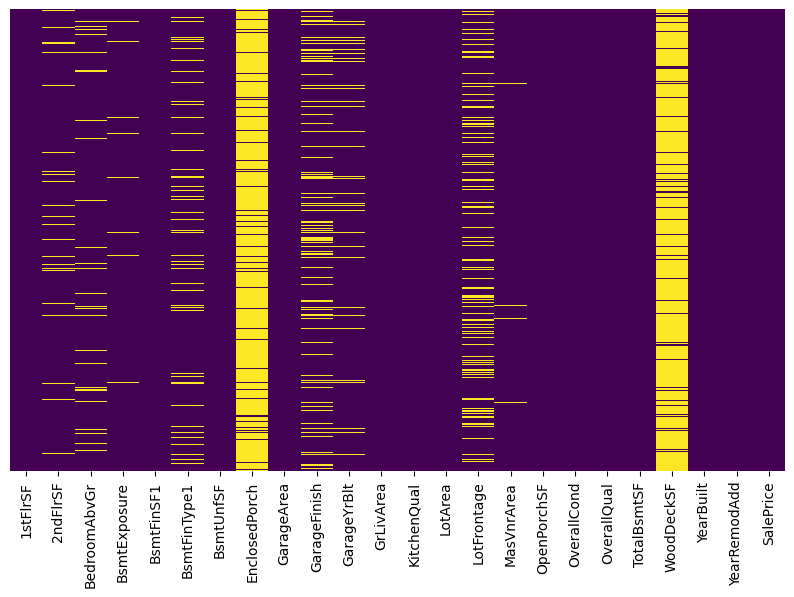

In [8]:
print(house_prices_df.isnull().sum())
plt.figure(figsize=(10,6))
sns.heatmap(house_prices_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

- With this graph, density of missing information in the columns. can be seen. We will be removing these coloums in data cleaning process.

In [ ]:
missing = house_prices_df.isnull().sum()
missing_percentage = (missing / len(house_prices_df)) * 100
print(missing_percentage)

1stFlrSF          0.000000
2ndFlrSF          5.890411
BedroomAbvGr      6.780822
BsmtExposure      2.602740
BsmtFinSF1        0.000000
BsmtFinType1      9.931507
BsmtUnfSF         0.000000
EnclosedPorch    90.684932
GarageArea        0.000000
GarageFinish     16.095890
GarageYrBlt       5.547945
GrLivArea         0.000000
KitchenQual       0.000000
LotArea           0.000000
LotFrontage      17.739726
MasVnrArea        0.547945
OpenPorchSF       0.000000
OverallCond       0.000000
OverallQual       0.000000
TotalBsmtSF       0.000000
WoodDeckSF       89.383562
YearBuilt         0.000000
YearRemodAdd      0.000000
SalePrice         0.000000
dtype: float64


- EnclosedPorch and WoodDeckSF columns' data have 90.68% and 89.38% missing data. 

In [14]:
house_prices_df.duplicated().value_counts()

False    1460
Name: count, dtype: int64

- There is not duplicated rows.

# INHERITED HOUSES

## 1. Dataset Information Analysis

In [9]:
inherited_houses_df = pd.read_csv(f"/workspace/P5-Heritage-Housing/outputs/datasets/collection/inherited_houses.csv")
inherited_houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       4 non-null      int64  
 1   2ndFlrSF       4 non-null      int64  
 2   BedroomAbvGr   4 non-null      int64  
 3   BsmtExposure   4 non-null      object 
 4   BsmtFinSF1     4 non-null      float64
 5   BsmtFinType1   4 non-null      object 
 6   BsmtUnfSF      4 non-null      float64
 7   EnclosedPorch  4 non-null      int64  
 8   GarageArea     4 non-null      float64
 9   GarageFinish   4 non-null      object 
 10  GarageYrBlt    4 non-null      float64
 11  GrLivArea      4 non-null      int64  
 12  KitchenQual    4 non-null      object 
 13  LotArea        4 non-null      int64  
 14  LotFrontage    4 non-null      float64
 15  MasVnrArea     4 non-null      float64
 16  OpenPorchSF    4 non-null      int64  
 17  OverallCond    4 non-null      int64  
 18  OverallQual   

# OBSERVATIONS, CONCLUSIONS AND NEXT STEPS